In [ ]:
import numpy as np
import scipy.stats as stats
import pandas as pd
from scipy.stats import norm, powerlaw, lognorm, t, binomtest, binom, poisson
import matplotlib.pyplot as plt

## **Why need distribution in data science?**

Distributions are an important concept in data science because they provide a way to describe and understand the patterns and characteristics of data. A distribution describes how the values in a dataset are spread out or clustered together, and provides information about the probability of observing different values or ranges of values.

### Types of distributions

* Normal Distribution
* Binomial Distribution
* Poisson Distribution
* Chi-Square Distribution
* t-Distribution
* F-Distribution

## **Why need normal distribution in data science ?**


**There are many reasons why the normal distribution is so important in data science, including:**

1. **Central Limit Theorem:** The normal distribution s the limit of the distribution of sample means as the sample size approaches infinity, according to the Central Limit Theorem. This means that the normal distribution is a good approximation of the distribution of sample means for many types of data, even if the underlying population distribution is not normal.

2. **Statistical Inference:** Many statistical tests and models, such as hypothesis testing, confidence interval estimation, and linear regression, are based on the assumption of normality. When data is normally distributed, it allows for more accurate and reliable statistical inference.

3. **Data Summarization:** The normal distribution is easy to understand and summarize using a few key parameters, such as the mean and standard deviation. This makes it a useful tool for summarizing and comparing data across different groups or time periods.

4. **Simulation and Modeling:** The normal distribution is often used as a model for continuous data in simulations and mathematical models. This allows for the prediction of future outcomes and the optimization of processes in many fields, such as finance, engineering, and healthcare.


### Example: Modeling Heights with Normal Distribution

Suppose we have a dataset of the heights of 1000 people, and we want t\o understand the distribution of heights in the population. We can use a histogram to visualize the distribution, and we observe that it is approximately bell-shaped, with most people falling within a certain range of heights.

We can then use the normal distribution to model this distribution, assuming that the heights follow a normal distribution with a certain mean and standard deviation. This allows us to make statistical inferences about the population, such as calculating the probability of a person being taller than a certain height or estimating the mean height of the population with a confidence interval.

### Rules:

1. The normal distribution is symmetric around the mean, with the same number of observations falling on either side of the mean.
2. The total area under the normal curve is equal to 1, meaning that the probability of observing any value is 1.
3. The normal distribution is defined by two parameters: the mean (μ) and the standard deviation (σ).
4. Approximately 68% of the observations fall within one standard deviation of the mean, 95% within two standard deviations, and 99.7% within three standard deviations.

### Functions:

1. Probability Density Function (PDF): The PDF of the normal distribution gives the probability of observing a particular value of the variable. It is given by the formula:

   $f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

2. Cumulative Distribution Function (CDF): The CDF of the normal distribution gives the probability of observing a value less than or equal to a certain value. It is calculated by integrating the PDF from negative infinity to the given value.


### Laws:

1. **Central Limit Theorem:** The central limit theorem states that the sum or average of a large number of independent and identically distributed random variables approaches a normal distribution, regardless of the underlying distribution of the variables.

2. **Law of Large Numbers:** The law of large numbers states that the sample mean of a large number of independent and identically distributed observations approaches the true population mean as the sample size increases.

Sample Mean: $\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i$

Sample Variance: $s^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})^2$


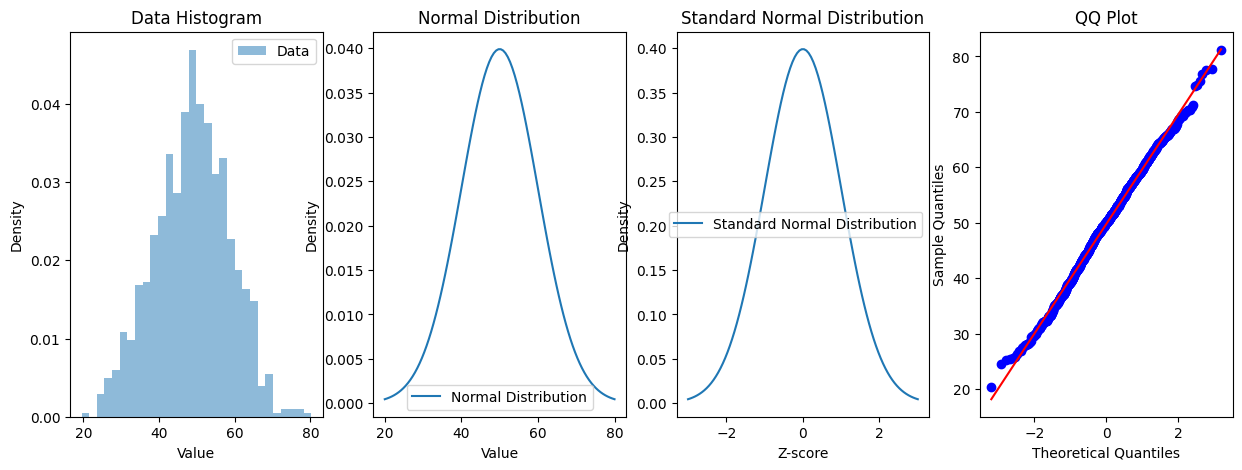

In [ ]:
mu, sigma = 50, 10
data = np.random.normal(mu, sigma, 1000)

hist, bin_edges = np.histogram(data, bins=30, density=True)

fig, axs = plt.subplots(1, 4, figsize=(15, 5))
axs[0].bar(bin_edges[:-1], hist, width=2, alpha=0.5, label='Data')

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
axs[1].plot(x, stats.norm.pdf(x, mu, sigma), label='Normal Distribution')

z = np.linspace(-3, 3, 100)
axs[2].plot(z, stats.norm.pdf(z, 0, 1), label='Standard Normal Distribution')

stats.probplot(data, dist='norm', plot=axs[3])

axs[0].set_xlabel('Value')
axs[0].set_ylabel('Density')
axs[0].set_title('Data Histogram')
axs[0].legend()

axs[1].set_xlabel('Value')
axs[1].set_ylabel('Density')
axs[1].set_title('Normal Distribution')
axs[1].legend()

axs[2].set_xlabel('Z-score')
axs[2].set_ylabel('Density')
axs[2].set_title('Standard Normal Distribution')
axs[2].legend()

axs[3].set_xlabel('Theoretical Quantiles')
axs[3].set_ylabel('Sample Quantiles')
axs[3].set_title('QQ Plot')

# Show the plots
plt.show()

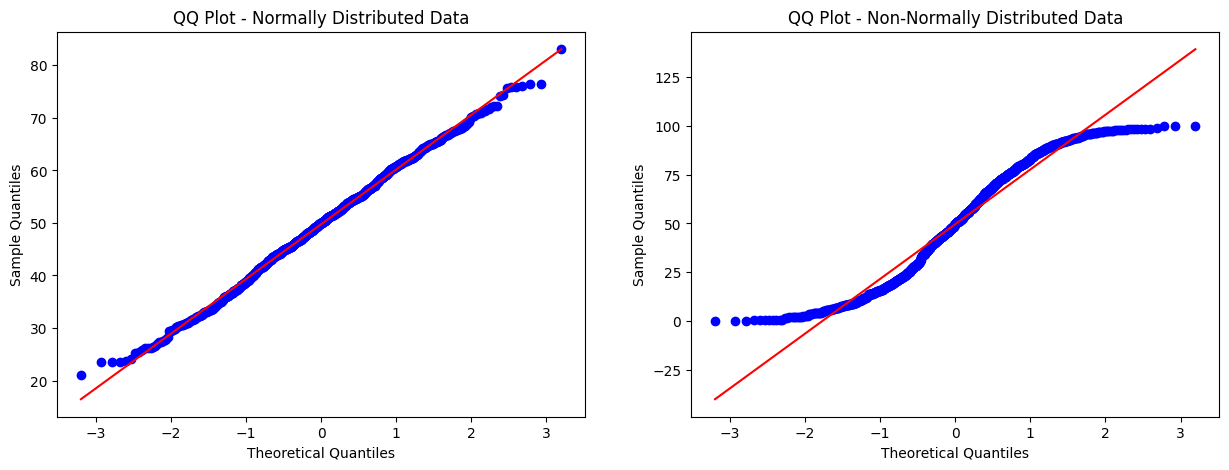

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

mu, sigma = 50, 10
data1 = np.random.normal(mu, sigma, 1000)
data3 = np.random.uniform(0, 100, 1000)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Generate QQ plots for each case
stats.probplot(data1, dist='norm', plot=axs[0])
axs[0].set_xlabel('Theoretical Quantiles')
axs[0].set_ylabel('Sample Quantiles')
axs[0].set_title('QQ Plot - Normally Distributed Data')

stats.probplot(data3, dist='norm', plot=axs[1])
axs[1].set_xlabel('Theoretical Quantiles')
axs[1].set_ylabel('Sample Quantiles')
axs[1].set_title('QQ Plot - Non-Normally Distributed Data')

# Show the plots
plt.show()

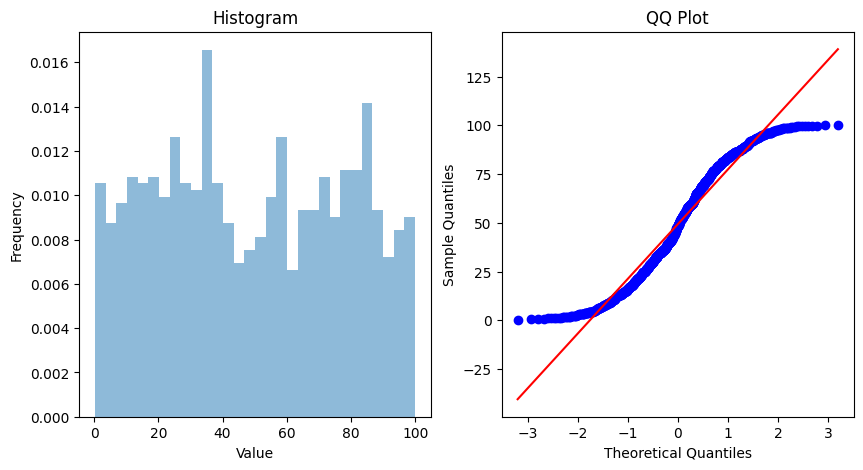

In [ ]:
mu, sigma = 50, 10
data =  np.random.uniform(0, 100, 1000)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(data, bins=30, density=True, alpha=0.5)

axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram')
stats.probplot(data, dist='norm', plot=axs[1])
axs[1].set_xlabel('Theoretical Quantiles')
axs[1].set_ylabel('Sample Quantiles')
axs[1].set_title('QQ Plot')

# Show the plots
plt.show()

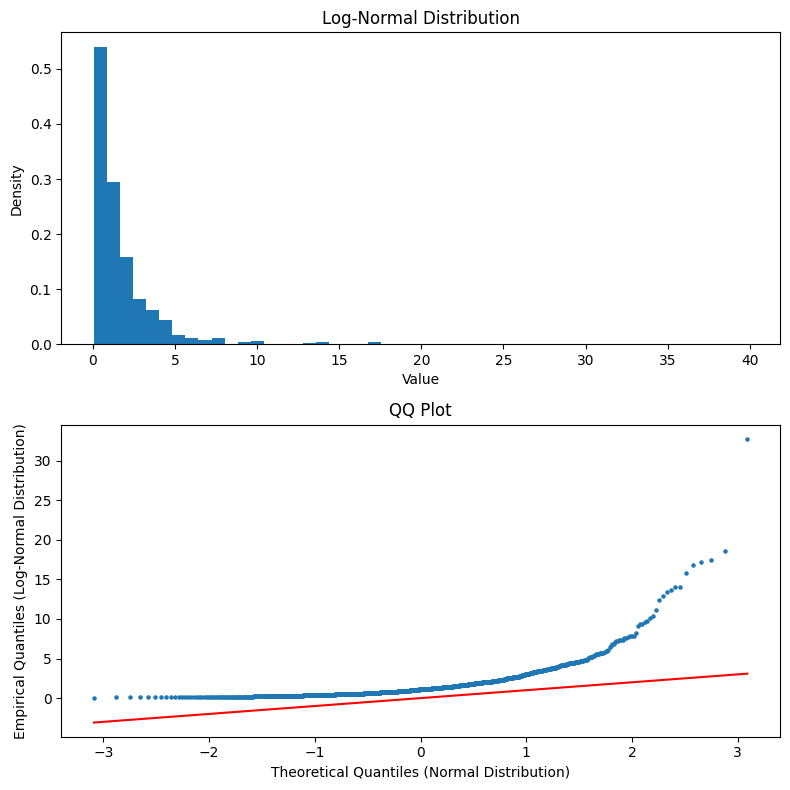

In [ ]:
mu = 0
sigma = 1
data = lognorm.rvs(sigma, loc=0, scale=np.exp(mu), size=1000)
data_sorted = np.sort(data)
empirical_quantiles = np.arange(1, len(data) + 1) / len(data)

theoretical_quantiles = norm.ppf(empirical_quantiles, loc=mu, scale=sigma)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
ax[0].hist(data, bins=50, density=True)
ax[0].set_xlabel('Value')
ax[0].set_ylabel('Density')
ax[0].set_title('Log-Normal Distribution')

# Create a QQ plot of the data
ax[1].scatter(theoretical_quantiles, data_sorted, s=5)
ax[1].plot(theoretical_quantiles, theoretical_quantiles, color='red')
ax[1].set_xlabel('Theoretical Quantiles (Normal Distribution)')
ax[1].set_ylabel('Empirical Quantiles (Log-Normal Distribution)')
ax[1].set_title('QQ Plot')

plt.tight_layout()
plt.show()

## **why need t-distribution in data science ?**

The `t-distribution` is an important concept in data science because it is used in situations where the `sample size` is `small` or the population `standard deviation` is `unknown`. The t-distribution is a probability distribution that is `similar in shape` to the `normal distribution`, but with heavier tails and more variability.

The `t-distribution` is also `used in situations` :
- where the population distribution is not normal ✔
- but the sample size is large enough to rely on the Central Limit Theorem. ✔
-------------
There are several reasons why the t-distribution is important in data science:

1. Hypothesis Testing: The t-distribution is used in hypothesis testing when the population standard deviation is unknown and must be estimated from the sample data. In this situation, the t-test is used to compare the means of two groups and determine if the difference is statistically significant.

2. Confidence Intervals: The t-distribution is used to construct confidence intervals when the population standard deviation is unknown. Confidence intervals provide a range of values within which the true population mean is likely to fall, based on the sample data.

3. Small Sample Sizes: The t-distribution is used when the sample size is small (typically less than 30) and the sample data are not normally distributed. In this situation, the t-distribution provides a better approximation of the true population distribution than the normal distribution.

4. Robustness: The t-distribution is more robust than the normal distribution to outliers and non-normality in the data. This means that the t-test and other statistical tests based on the t-distribution are more reliable in situations where the data are not perfectly normally distributed.

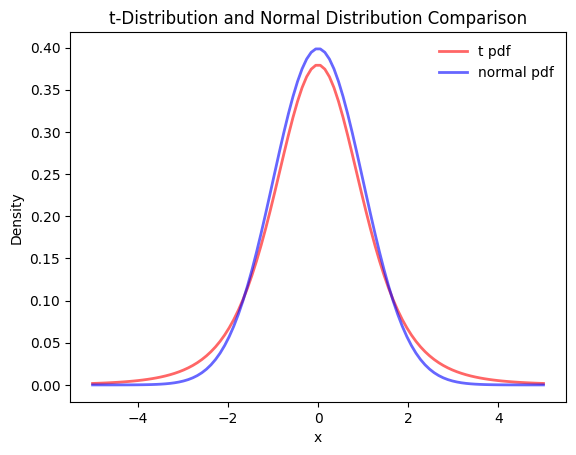

In [ ]:
df = 5
x = np.linspace(-5, 5, 100)
t_dist = t.pdf(x, df)
normal_dist = norm.pdf(x)
fig, ax = plt.subplots()
ax.plot(x, t_dist, 'r-', lw=2, alpha=0.6, label='t pdf')
ax.plot(x, normal_dist, 'b-', lw=2, alpha=0.6, label='normal pdf')
ax.set_xlabel('x')
ax.set_ylabel('Density')
ax.set_title('t-Distribution and Normal Distribution Comparison')
ax.legend(loc='best', frameon=False)
plt.show()

### Question 1:

Suppose you want to estimate the average height of students in a particular school, but you only have a small sample of 10 students. You measure the height of each student in your sample and calculate the sample mean height to be 165.1 centimeters, with a sample standard deviation of 7.62 centimeters.

Using this information, calculate a 95% confidence interval for the population mean height of the students in the school. Assume that the population is normally distributed.

In [ ]:
import numpy as np
from scipy.stats import t


sample_mean = 165.1
sample_std = 7.62
sample_size = 10


t_value = t.ppf(0.975, sample_size-1)
std_error = sample_std / np.sqrt(sample_size)

# marin_of_error = z_value * std_population
margin_of_error = t_value * std_error

conf_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print("Sample mean height: {:.2f} cm".format(sample_mean))
print("Sample standard deviation: {:.2f} cm".format(sample_std))
print("Sample size: {}".format(sample_size))
print("95% confidence interval for population mean height: ({:.2f} cm, {:.2f} cm)".format(conf_interval[0], conf_interval[1]))

Sample mean height: 165.10 cm
Sample standard deviation: 7.62 cm
Sample size: 10
95% confidence interval for population mean height: (159.65 cm, 170.55 cm)



## Binomial Distribution


**The binomial distribution is a probability distribution that describes the probability of observing a certain number of successes in a fixed number of independent trials, where each trial has only two possible outcomes (success or failure) and the probability of success is the same for each trial. The binomial distribution is a discrete distribution, meaning that it describes the probability of a finite number of outcomes**.

The **binomial distribution** is characterized by `two parameters`:
- the number of trials `(n)`
- the probability of success `(p)`.

The probability of observing exactly k successes in n trials is given by the binomial probability mass function:

`P(X=k) = (n choose k) * p^k * (1-p)^(n-k)`

where:
- `X` is the random variable representing the number of successes in n trials
- `k` is the number of successes
- `n` choose k is the binomial coefficient, which represents the number of ways to choose `k` items from a set of `n` items
- `p^k` represents the probability of k successes
- `(1-p)^(n-k)` represents the probability of n-k failures

The mean and variance of the binomial distribution are given by:

`Mean = np`

`Variance = np(1-p)`

The binomial distribution is commonly used in hypothesis testing and quality control, where the goal is to determine if the observed proportion of successes is significantly different from a hypothesized proportion. It is also used in reliability analysis and risk analysis to model the probability of events occurring over time.

### Example

An example of using the binomial distribution in hypothesis testing is in A/B testing, where we want to compare the effectiveness of two different versions of a website or marketing campaign. Suppose we have two versions of a website, A and B, and we want to determine if version B has a higher conversion rate than version A. We can set up the following null and alternative hypotheses:

- Null Hypothesis (H0): The conversion rate for version B is not significantly different from the conversion rate for version A.
- Alternative Hypothesis (HA): The conversion rate for version B is significantly higher than the conversion rate for version A.

We can use the binomial distribution to model the number of successes (i.e., conversions) in each version of the website, assuming that the probability of a conversion is the same for both versions. We can then use a one-tailed test to determine if the observed proportion of successes in version B is significantly higher than the expected proportion under the null hypothesis.

Suppose we run a test with 1000 visitors to each version of the website, and we observe 50 conversions in version A and 75 conversions in version B. The conversion rate for version A is 0.05, and the conversion rate for version B is 0.075. We can calculate the expected number of conversions in version B under the null hypothesis as:

Expected Conversions = 1000 * 0.05 = 50

We can then use the binomial distribution to calculate the probability of observing 75 or more conversions in version B, assuming that the conversion rate is the same as in version A. The p-value is the probability of observing a test statistic as extreme or more extreme than the observed test statistic, assuming that the null hypothesis is true. In this case, the test statistic is the number of conversions in version B, and the p-value is the probability of observing 75 or more conversions in version B out of 1000 trials, given a conversion rate of 0.05.

Using the binomial distribution, we can calculate the p-value as:

P(X >= 75) = 1 - P(X < 75) = 1 - P(X <= 74)

where X ~ Binomial(n=1000, p=0.05), and P(X <= 74) is the cumulative probability of observing 74 or fewer conversions in version B.

We can use statistical software to calculate the p-value, which is approximately 0.005. This means that if the null hypothesis is true (i.e., the conversion rate for version B is the same as the conversion rate for version A), the probability of observing 75 or more conversions in version B is only 0.5%. This is a very small probability, and we can reject the null hypothesis at a significance level of 0.05. We can conclude that there is strong evidence that the conversion rate for version B is significantly higher than the conversion rate for version A.

### Example by code



In [ ]:
n = 1000
p_a = 0.05
p_b = 0.075
conversions_a = np.random.binomial(n, p_a)
conversions_b = np.random.binomial(n, p_b)
p_value = binomtest(conversions_b, n=n, p=p_a, alternative='greater')

# Print the results
print(f"Conversions for version A: {conversions_a}")
print(f"Conversions for version B: {conversions_b}")
print(f"p-value: {p_value.pvalue}")

Conversions for version A: 53
Conversions for version B: 70
p-value: 0.0034743586988460772


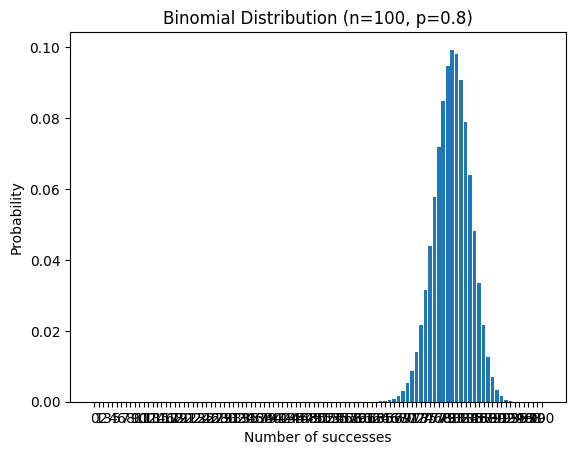

In [ ]:
n = 100
p = 0.8
binom_dist = binom(n, p)
x = np.arange(0, n+1)
probabilities = binom_dist.pmf(x)

# Plot the distribution
fig, ax = plt.subplots()
ax.bar(x, probabilities)
ax.set_xticks(x)
ax.set_xlabel('Number of successes')
ax.set_ylabel('Probability')
ax.set_title(f'Binomial Distribution (n={n}, p={p})')
plt.show()

###  Normal Approximation

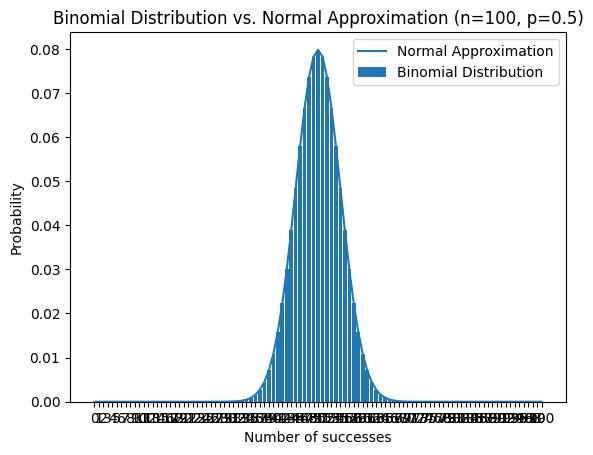

In [ ]:
n = 100
p = 0.5
binom_dist = binom(n, p)
x = np.arange(0, n+1)
probabilities = binom_dist.pmf(x)
mean = n * p
variance = n * p * (1 - p)
std_dev = np.sqrt(variance)
normal_dist = norm(mean, std_dev)
normal_probabilities = normal_dist.pdf(x)
fig, ax = plt.subplots()
ax.bar(x, probabilities, label='Binomial Distribution')
ax.plot(x, normal_probabilities, label='Normal Approximation')
ax.set_xticks(x)
ax.set_xlabel('Number of successes')
ax.set_ylabel('Probability')
ax.set_title('Binomial Distribution vs. Normal Approximation (n=100, p=0.5)')
ax.legend()
plt.show()

## what is Poisson Distribution ?

The Poisson distribution is a probability distribution that describes the number of independent, rare events that occur in a fixed interval of time or space. It is named after the French mathematician Siméon Denis Poisson, who first introduced the distribution in the 19th century.

The Poisson distribution is characterized by a `single parameter`, denoted by λ (lambda), which represents the average rate of occurrence of the rare events. The probability mass function (PMF) of the Poisson distribution is given by:

P(X = k) = e^(-λ) * λ^k / k!

where X is a random variable that represents the number of rare events, k is a non-negative integer, and e is the mathematical constant approximately equal to 2.71828.

The Poisson distribution has several important properties, including:

- The mean and variance of the Poisson distribution are both equal to λ.
- The Poisson distribution is a limiting case of the binomial distribution, when the number of trials (n) goes to infinity and the probability of success (p) goes to 0, in such a way that np = λ.
- The Poisson distribution is a discrete distribution, but it can be approximated by a normal distribution when λ is large.

The Poisson distribution is commonly used in a variety of applications, such as:

- Modeling the number of arrivals in a queue or the number of defects in a production process.
- Modeling the number of rare events, such as accidents, earthquakes, or meteorite impacts.
- Modeling the distribution of the number of words in a document or the number of mutations in a DNA sequence.
- Modeling the distribution of the number of customers in a service system or the number of clicks on a website.

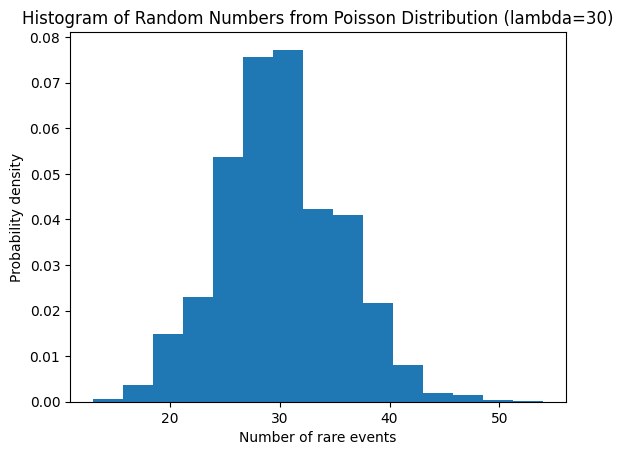

In [ ]:
lam = 30
poisson_dist = poisson(lam)
random_numbers = poisson_dist.rvs(size=10000)
fig, ax = plt.subplots()
ax.hist(random_numbers, bins=15, density=True)
ax.set_xlabel('Number of rare events')
ax.set_ylabel('Probability density')
ax.set_title(f'Histogram of Random Numbers from Poisson Distribution (lambda={lam})')
plt.show()

## Exponential Distribution

The exponential distribution is a probability distribution that describes the time between two successive events in a Poisson process, where the events occur independently and at a constant rate. It is often used to model the lifetime of a system or device, the time between arrivals in a queue, or the duration of a phone call, among other applications.

The exponential distribution is characterized by a single parameter, denoted by λ (lambda), which represents the rate of occurrence of the events. The probability density function (PDF) of the exponential distribution is given by:

f(x; λ) = λ * e^(-λ * x)

where x is a non-negative real number, and e is the mathematical constant approximately equal to 2.71828.

The cumulative distribution function (CDF) of the exponential distribution is given by:

F(x; λ) = 1 - e^(-λ * x)
>  The mean of = `1/λ`

>the variance = `1/λ^2`.

The exponential distribution has several important properties, including:

- The exponential distribution is memoryless, which means that the probability of an event occurring in the next time interval does not depend on how long it has been since the last event occurred.
- The exponential distribution is a special case of the gamma distribution, when the shape parameter is equal to 1.
- The exponential distribution is used in the Poisson process, where the time between two successive events follows an exponential distribution with the same parameter λ.

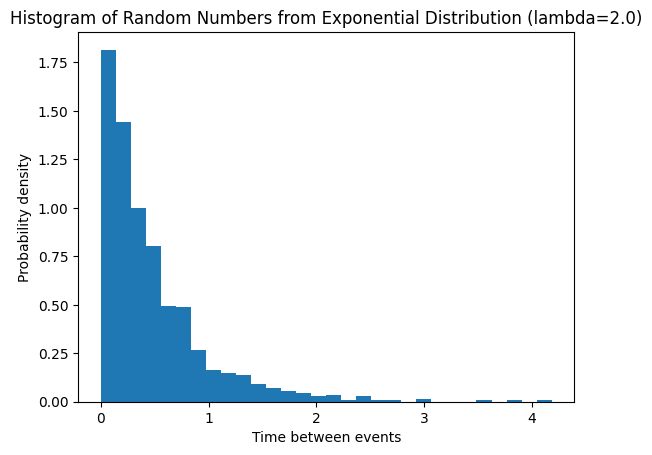

In [ ]:
lam = 2.0
random_numbers = np.random.exponential(scale=1/lam, size=1000)
fig, ax = plt.subplots()
ax.hist(random_numbers, bins=30, density=True)
ax.set_xlabel('Time between events')
ax.set_ylabel('Probability density')
ax.set_title(f'Histogram of Random Numbers from Exponential Distribution (lambda={lam})')
plt.show()

## Chi-Square Distribution

The chi-square distribution is a probability distribution that arises in statistics and is used in hypothesis testing, confidence interval estimation, and other applications. It is the distribution of the sum of the squares of independent standard normal random variables. The chi-square distribution is characterized by a single parameter, denoted by k, which represents the degrees of freedom of the distribution.

The probability density function (PDF) of the chi-square distribution with k degrees of freedom is given by:

f(x; k) = (1 / (2^(k/2) * Gamma(k/2))) * x^(k/2 - 1) * e^(-x/2)

where x is a non-negative real number, Gamma is the gamma function, and e is the mathematical constant approximately equal to 2.71828.

The cumulative distribution function (CDF) of the chi-square distribution with k degrees of freedom is given by:

F(x; k) = (1 / Gamma(k/2)) * gamma(k/2, x/2)

where gamma is the incomplete gamma function.

 > The mean = k

 > The variance = 2k.

The chi-square distribution has several important properties, including:

- The chi-square distribution is a special case of the gamma distribution, when the shape parameter is equal to k/2 and the scale parameter is equal to 1/2.
- The chi-square distribution is used in hypothesis testing, where it is used to test whether the observed data differs significantly from the expected data, and in confidence interval estimation, where it is used to estimate the variance of a population based on a sample.


-----------------------------


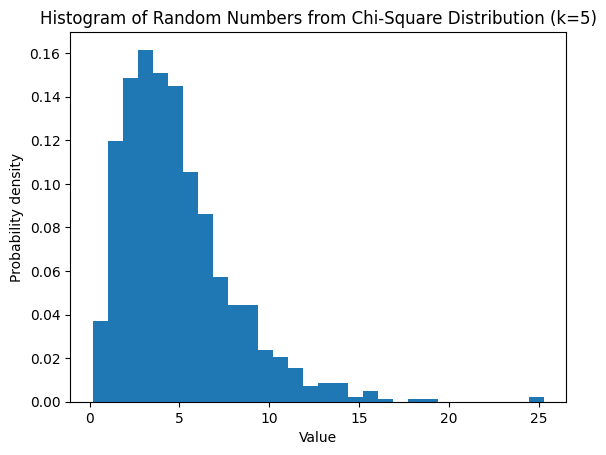

In [ ]:
k = 5
random_numbers = np.random.chisquare(df=k, size=1000)
fig, ax = plt.subplots()
ax.hist(random_numbers, bins=30, density=True)
ax.set_xlabel('Value')
ax.set_ylabel('Probability density')
ax.set_title(f'Histogram of Random Numbers from Chi-Square Distribution (k={k})')
plt.show()

#### Question chi square

Imagine we conducted a survey among 200 people, asking them about their favorite genres of movies (Action, Comedy, Drama) and their age group (Young, Middle-aged, Elderly). We want to analyze if there is a significant association between movie genre preference and age group.

In [ ]:
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt


observed_frequencies = np.array([[30, 50, 20],
                                 [40, 30, 30],
                                 [20, 40, 40]])

genre_labels = ['Action', 'Comedy', 'Drama']
age_labels = ['Young', 'Middle-aged', 'Elderly']

print("Contingency Table (Observed Frequencies):")
for i, row in enumerate(observed_frequencies):
    print(age_labels[i], row)


chi2, p_value, _, _ = chi2_contingency(observed_frequencies)

print("\nChi-square statistic:", chi2)
print("P-value:", p_value)

Contingency Table (Observed Frequencies):
Young [30 50 20]
Middle-aged [40 30 30]
Elderly [20 40 40]

Chi-square statistic: 18.333333333333336
P-value: 0.0010620521289556695


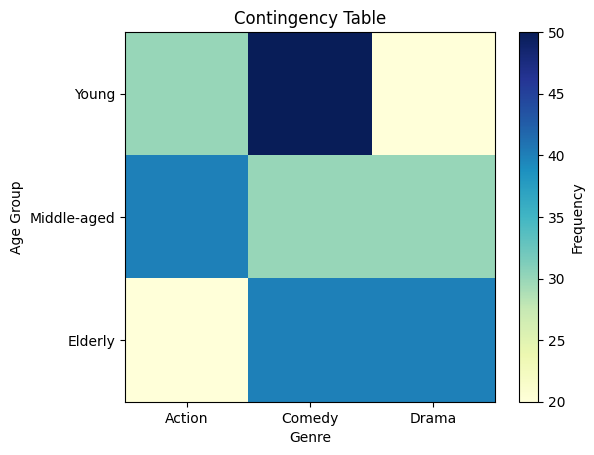

In [ ]:
plt.imshow(observed_frequencies, cmap='YlGnBu',)

plt.colorbar(label='Frequency')
plt.xticks(np.arange(len(genre_labels)), genre_labels)
plt.yticks(np.arange(len(age_labels)), age_labels)
plt.xlabel('Genre')
plt.ylabel('Age Group')
plt.title('Contingency Table')

plt.show()

## F-Distribution